    ### Pandas 패키지를 활용한 데이터 프레임 구조, 및 주식데이터 그리기


In [ ]:
import pandas as pd

kakao=pd.Series([92600,92400,92100,94300,92300])
print(kakao)

In [ ]:
kakao2=pd.Series([92600,92400,92100,94300,92300], index=['2016-02-19','2016-02-18','2016-02-17','2016-02-16','2016-02-15'])
print(kakao2)

In [ ]:
kakao2=pd.Series([92600,92400,92100,94300,92300], index=['2016-02-19','2016-02-18','2016-02-17','2016-02-16','2016-02-15'])
print(kakao2)

In [ ]:
jeong=pd.Series([10,20,30], index=['AAPL','KAKAO','SAMSUNG'])
baek=pd.Series([20,30,40], index=['SAMSUNG','KAKAO','AAPL'])

merge= jeong + baek
print(merge)


In [ ]:
#pd.DataFrame을 사용하면 엑셀형태로 표현이 가능하다.

data1={'col0':[1,2,3,4],'col1':[10,20,30,40],'col2':[100,200,300,400]}

data=pd.DataFrame(data1)

print(data)

In [ ]:
daeshin = {'open':  [11650, 11100, 11200, 11100, 11000],
           'high':  [12100, 11800, 11200, 11100, 11150],
           'low' :  [11600, 11050, 10900, 10950, 10900],
           'close': [11900, 11600, 11000, 11100, 11050]}

daeshin_day=pd.DataFrame(daeshin)
print(daeshin_day)


In [ ]:
date = ['16.02.29', '16.02.26', '16.02.25', '16.02.24', '16.02.23']
daeshin = pd.DataFrame({'open':  [11650, 11100, 11200, 11100, 11000],
           'high':  [12100, 11800, 11200, 11100, 11150],
           'low' :  [11600, 11050, 10900, 10950, 10900],
           'close': [11900, 11600, 11000, 11100, 11050]},index=date)
print(daeshin)

### DataFrame 객체의 칼럼에 접근하려면 칼럼 이름을 지정하면 되고, 로우에 접근하려면 loc 메서드를 통해 인덱스 값을 지정하면 됩니다.

In [ ]:
a=daeshin.loc['16.02.24']
print(a)

### 이평선 구하고 그리기

In [ ]:
import pandas as pd
import pandas_datareader as dt

sm=dt.DataReader("005930.KS","yahoo","2020-01-01","2022-01-20")
sm_exemptv0=sm[sm['Volume']!=0] #거래량이 0인 값들을 제외한다는 코드/ 쉽게 데이터를 분류할 수 있는 장점
ma5=sm_exemptv0['Adj Close'].rolling(window=5).mean()
ma20=sm_exemptv0['Adj Close'].rolling(window=20).mean()
ma60=sm_exemptv0['Adj Close'].rolling(window=60).mean()
ma120=sm_exemptv0['Adj Close'].rolling(window=120).mean()
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA5",ma5) #insert(칼럼 추가할 위치, 칼럼 이름, 칼럼 데이터
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA20",ma20)
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA60",ma60)
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA120",ma120)
sm_exemptv0.tail(5)

In [ ]:
plt.plot(sm_exemptv0.index,sm_exemptv0['Adj Close'],label='Adj Close')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA5'],label='MA5')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA20'],label='MA20')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA60'],label='MA60')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA120'],label='MA120')
plt.xlabel('Timeline',labelpad=10)
plt.ylabel('Price',labelpad=10)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import pandas_datareader as dt
import matplotlib.pyplot as plt

 # 리스트 만들고 for 문 돌리면서 각각의 그래프 만들어주는거 해보자

sm=dt.DataReader("005930.KS","yahoo","2020-01-01","2022-01-20")
sm_exemptv0=sm[sm['Volume']!=0] #거래량이 0인 값들을 제외한다는 코드/ 쉽게 데이터를 분류할 수 있는 장점
ma5=sm_exemptv0['Adj Close'].rolling(window=5).mean()
ma20=sm_exemptv0['Adj Close'].rolling(window=20).mean()
ma60=sm_exemptv0['Adj Close'].rolling(window=60).mean()
ma120=sm_exemptv0['Adj Close'].rolling(window=120).mean()

sm_exemptv0.insert(len(sm_exemptv0.columns),"MA5",ma5) #insert(칼럼 추가할 위치, 칼럼 이름, 칼럼 데이터
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA20",ma20)
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA60",ma60)
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA120",ma120)


plt.plot(sm_exemptv0.index,sm_exemptv0['Adj Close'],label='Adj Close')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA5'],label='MA5')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA20'],label='MA20')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA60'],label='MA60')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA120'],label='MA120')
plt.xlabel('Timeline',labelpad=10,loc='right')
plt.ylabel('Price',labelpad=10,loc='top')
plt.legend()
plt.show()

ka=dt.DataReader("035720.KS","yahoo","2020-01-01","2022-01-20")


#### 주식 명을 입력하면 그래프를 그려주는 함수. -1: 그래프 각각 -2: 그래프 위에 추가해주는 함수

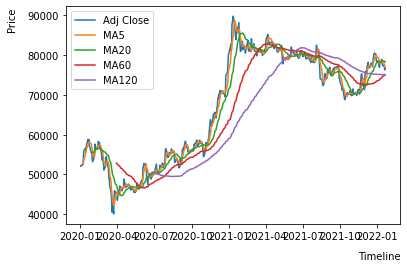

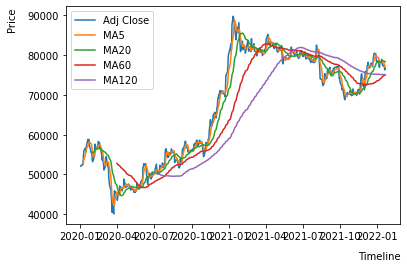

In [13]:
import pandas as pd
import pandas_datareader as dt
import matplotlib.pyplot as plt

def graph_drawing(a,b,c,d):
   #'종목코드 및 조회기간을 입력 ex) "005930.KS","yahoo","2020-01-01","2022-01-20"')
    x=dt.DataReader(a,b,c,d)
    x_exemptv0=x[x['Volume']!=0] #거래량이 0인 값들을 제외한다는 코드/ 쉽게 데이터를 분류할 수 있는 장점
    ma5=x_exemptv0['Adj Close'].rolling(window=5).mean()
    ma20=x_exemptv0['Adj Close'].rolling(window=20).mean()
    ma60=x_exemptv0['Adj Close'].rolling(window=60).mean()
    ma120=x_exemptv0['Adj Close'].rolling(window=120).mean()

    x_exemptv0.insert(len(x_exemptv0.columns),"MA5",ma5) #insert(칼럼 추가할 위치, 칼럼 이름, 칼럼 데이터
    x_exemptv0.insert(len(x_exemptv0.columns),"MA20",ma20)
    x_exemptv0.insert(len(x_exemptv0.columns),"MA60",ma60)
    x_exemptv0.insert(len(x_exemptv0.columns),"MA120",ma120)


    plt.plot(x_exemptv0.index,x_exemptv0['Adj Close'],label='Adj Close')
    plt.plot(x_exemptv0.index,x_exemptv0['MA5'],label='MA5')
    plt.plot(x_exemptv0.index,x_exemptv0['MA20'],label='MA20')
    plt.plot(x_exemptv0.index,x_exemptv0['MA60'],label='MA60')
    plt.plot(x_exemptv0.index,x_exemptv0['MA120'],label='MA120')
    plt.xlabel('Timeline',labelpad=10,loc='right')
    plt.ylabel('Price',labelpad=10,loc='top')
    plt.legend()
    plt.show()

graph_drawing("035720.KS","yahoo","2020-01-01","2022-01-20")
graph_drawing("005930.KS","yahoo","2020-01-01","2022-01-20")
    

In [21]:
import pandas as pd
import pandas_datareader as dt
import matplotlib.pyplot as plt

def graph_drawing(a,b,c,d):
    stock_list=[]
    y=dt.DataReader(a,b,c,d)
    stock_list.append(y)
    for x in stock_list:
        x_exemptv0=x[x['Volume']!=0] #거래량이 0인 값들을 제외한다는 코드/ 쉽게 데이터를 분류할 수 있는 장점
        ma5=x_exemptv0['Adj Close'].rolling(window=5).mean()
        ma20=x_exemptv0['Adj Close'].rolling(window=20).mean()
        ma60=x_exemptv0['Adj Close'].rolling(window=60).mean()
        ma120=x_exemptv0['Adj Close'].rolling(window=120).mean()

        x_exemptv0.insert(len(x_exemptv0.columns),"MA5",ma5) #insert(칼럼 추가할 위치, 칼럼 이름, 칼럼 데이터)
        x_exemptv0.insert(len(x_exemptv0.columns),"MA20",ma20)
        x_exemptv0.insert(len(x_exemptv0.columns),"MA60",ma60)
        x_exemptv0.insert(len(x_exemptv0.columns),"MA120",ma120)
        plt.plot(x_exemptv0.index,x_exemptv0['Adj Close'],label='Adj Close')
        plt.plot(x_exemptv0.index,x_exemptv0['MA5'],label='MA5')
        plt.plot(x_exemptv0.index,x_exemptv0['MA20'],label='MA20')
        plt.plot(x_exemptv0.index,x_exemptv0['MA60'],label='MA60')
        plt.plot(x_exemptv0.index,x_exemptv0['MA120'],label='MA120')
        plt.xlabel('Timeline',labelpad=10,loc='right')
        plt.ylabel('Price',labelpad=10,loc='top')
        plt.legend()
        plt.show()


    
    # plt.show()

graph_drawing("035720.KS","yahoo","2020-01-01","2022-01-20") #카카오
graph_drawing("005930.KS","yahoo","2020-01-01","2022-01-20") #삼전

#함수를 여러개로 만들자

TypeError: graph_drawing() takes 4 positional arguments but 8 were given